<a href="https://colab.research.google.com/github/jhosephone/IAUDEA/blob/main/05_modelo_Simple_Logistic_Regression_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORACION DE DATOS

In [1]:
import pandas as pd
import os

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [3]:
!KAGGLE_CONFIG_DIR="." kaggle competitions download -c udea-ai4eng-20242

 45% 9.00M/20.1M [00:00<00:00, 83.6MB/s]
100% 20.1M/20.1M [00:00<00:00, 122MB/s] 


In [4]:
!unzip udea-ai4eng-20242.zip

Archive:  udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd

df = pd.read_csv('train.csv')

In [6]:
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [7]:
print("\nDescripción estadística del dataset:")
print(df.describe(include='all'))


Descripción estadística del dataset:
                   ID        PERIODO ESTU_PRGM_ACADEMICO  \
count   692500.000000  692500.000000              692500   
unique            NaN            NaN                 948   
top               NaN            NaN             DERECHO   
freq              NaN            NaN               53244   
mean    494606.130576   20198.366679                 NaN   
std     285585.209455      10.535037                 NaN   
min          1.000000   20183.000000                 NaN   
25%     247324.750000   20195.000000                 NaN   
50%     494564.500000   20195.000000                 NaN   
75%     741782.500000   20203.000000                 NaN   
max     989286.000000   20213.000000                 NaN   

       ESTU_PRGM_DEPARTAMENTO          ESTU_VALORMATRICULAUNIVERSIDAD  \
count                  692500                                  686213   
unique                     31                                       8   
top                   

In [8]:
import pandas as pd

# Cargar el archivo train.csv
df = pd.read_csv("train.csv")

# Mostrar un resumen general del DataFrame
print("Información general del DataFrame:")
print(df.info())

print("\nResumen de columnas y su contenido:")

# Iterar sobre cada columna para inspeccionar su contenido
for col in df.columns:
    print("\n----------------------------------------")
    print(f"Columna: {col}")
    print(f"Tipo de dato: {df[col].dtype}")

    # Mostrar los primeros 5 valores
    print("Primeros 5 valores:")
    print(df[col].head().tolist())

    # Mostrar la cantidad de valores únicos
    n_unique = df[col].nunique()
    print(f"Cantidad de valores únicos: {n_unique}")

    # Si la cantidad de valores únicos es pequeña, mostrar todos ellos
    if n_unique <= 20:
        print("Valores únicos:")
        print(df[col].unique())
    else:
        # Si son muchos valores únicos, mostrar las 5 entradas más frecuentes
        print("Frecuencia de los 5 valores más comunes:")
        print(df[col].value_counts().head())

    # Mostrar cantidad de valores faltantes en la columna
    missing = df[col].isnull().sum()
    print(f"Valores faltantes: {missing}")


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object


In [9]:
import pandas as pd

# Cargar el archivo train.csv
df = pd.read_csv("train.csv")

# Imprimir un resumen general del DataFrame
print("Información general del DataFrame:")
print(df.info())
print("\n----------------------------------------\n")

# Iterar sobre cada columna para inspeccionar su contenido
for col in df.columns:
    print("========================================")
    print(f"Columna: {col}")
    print(f"Tipo de dato: {df[col].dtype}")

    # Mostrar los primeros 5 valores
    print("\nPrimeros 5 valores:")
    print(df[col].head().tolist())

    # Mostrar la cantidad de valores únicos
    n_unique = df[col].nunique()
    print(f"\nCantidad de valores únicos: {n_unique}")

    # Si son pocos valores únicos, mostrarlos todos; de lo contrario, los 5 más frecuentes
    if n_unique <= 20:
        print("Valores únicos:")
        print(df[col].unique())
    else:
        print("Frecuencia de los 5 valores más comunes:")
        print(df[col].value_counts().head())

    # Mostrar cantidad de valores faltantes en la columna
    missing = df[col].isnull().sum()
    print(f"\nValores faltantes: {missing}")
    print("========================================\n")


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object


In [10]:
import pandas as pd

# Cargar el archivo train.csv
df = pd.read_csv("train.csv")

# Obtener los valores únicos de las columnas indicadas
unique_programs = df['ESTU_PRGM_ACADEMICO'].unique()
unique_departments = df['ESTU_PRGM_DEPARTAMENTO'].unique()

# Crear DataFrames para mostrar los valores únicos en forma de tabla
df_programs = pd.DataFrame(unique_programs, columns=["Valores Únicos de ESTU_PRGM_ACADEMICO"])
df_departments = pd.DataFrame(unique_departments, columns=["Valores Únicos de ESTU_PRGM_DEPARTAMENTO"])

# Mostrar las tablas resultantes
print("Tabla con los valores únicos de ESTU_PRGM_ACADEMICO:")
print(df_programs)

print("\nTabla con los valores únicos de ESTU_PRGM_DEPARTAMENTO:")
print(df_departments)


Tabla con los valores únicos de ESTU_PRGM_ACADEMICO:
                 Valores Únicos de ESTU_PRGM_ACADEMICO
0                                           ENFERMERIA
1                                              DERECHO
2                                MERCADEO Y PUBLICIDAD
3                           ADMINISTRACION DE EMPRESAS
4                                           PSICOLOGIA
..                                                 ...
943  PROFESIONAL UNIVERSITARIO EN DISEÑO TEXTIL PAR...
944                                 QUIMICA Y FARMACIA
945  LICENCIATURA EN EDUCACON FISICA, RECREACION Y ...
946                   COMUNICACIÓN SOCIAL Y PERIODISMO
947              PROFESIONAL EN INVESTIGACIÓN CRIMINAL

[948 rows x 1 columns]

Tabla con los valores únicos de ESTU_PRGM_DEPARTAMENTO:
   Valores Únicos de ESTU_PRGM_DEPARTAMENTO
0                                    BOGOTÁ
1                                 ATLANTICO
2                                 SANTANDER
3                             

In [11]:
import pandas as pd

# Cargar el archivo train.csv
df = pd.read_csv("train.csv")

# Extraer los valores únicos de la columna ESTU_PRGM_ACADEMICO
unique_programs = df["ESTU_PRGM_ACADEMICO"].unique()

# Crear un diccionario que asigne un número a cada valor único.
# Se ordenan los valores para obtener siempre la misma codificación.
mapping = {value: idx for idx, value in enumerate(sorted(unique_programs))}

# Aplicar el mapeo a la columna y crear una nueva columna con los valores codificados.
df["ESTU_PRGM_ACADEMICO_encoded"] = df["ESTU_PRGM_ACADEMICO"].map(mapping)

# Mostrar la tabla del mapeo (valor original y su correspondiente codificación)
mapping_df = pd.DataFrame(list(mapping.items()), columns=["ESTU_PRGM_ACADEMICO", "Encoded"])
print("Tabla de codificación para ESTU_PRGM_ACADEMICO:")
print(mapping_df)

# (Opcional) Mostrar las primeras filas del DataFrame resultante
print("\nPrimeras filas del DataFrame con la columna codificada:")
print(df[["ESTU_PRGM_ACADEMICO", "ESTU_PRGM_ACADEMICO_encoded"]].head())


Tabla de codificación para ESTU_PRGM_ACADEMICO:
                                ESTU_PRGM_ACADEMICO  Encoded
0    3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES        0
1                        ACTIVIDAD FISICA Y DEPORTE        1
2                                       ACUICULTURA        2
3                                    ADMINISTRACION        3
4                        ADMINISTRACION  FINANCIERA        4
..                                              ...      ...
943                                  TRABAJO SOCIAL      943
944               TRADUCCION INGLES-FRANCES-ESPAÑOL      944
945                                         TURISMO      945
946                                       URBANISMO      946
947                                       ZOOTECNIA      947

[948 rows x 2 columns]

Primeras filas del DataFrame con la columna codificada:
          ESTU_PRGM_ACADEMICO  ESTU_PRGM_ACADEMICO_encoded
0                  ENFERMERIA                          300
1                    


Columna: ID

Tabla de frecuencias:
ID
904256    1
915348    1
373660    1
691058    1
790510    1
         ..
190471    1
882806    1
297614    1
540154    1
933374    1
Name: count, Length: 692500, dtype: int64


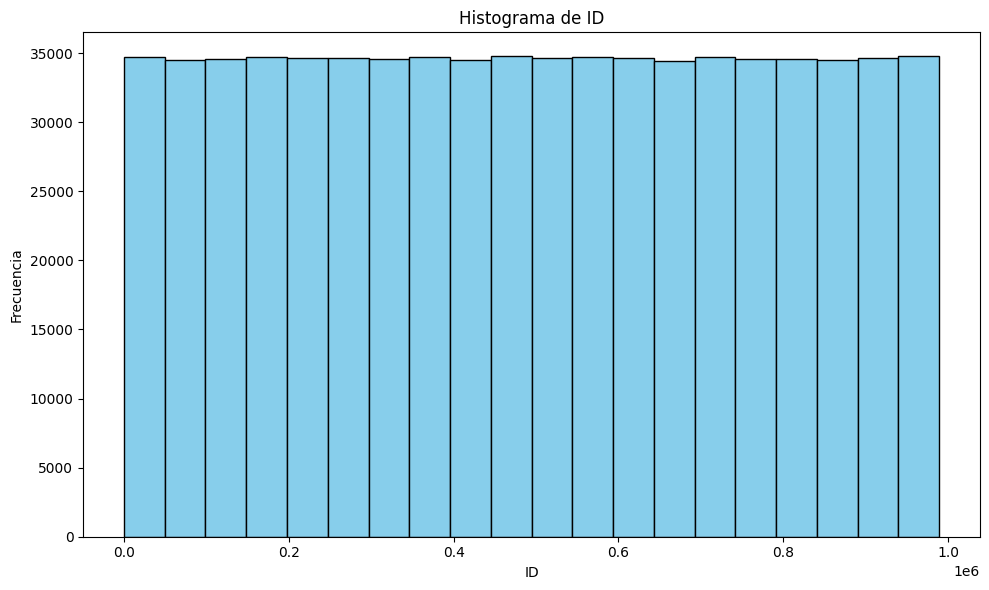


Columna: PERIODO

Tabla de frecuencias:
PERIODO
20195    180873
20203    171838
20212    171412
20183    164818
20194      1472
20213      1178
20202       490
20184       254
20196       165
Name: count, dtype: int64


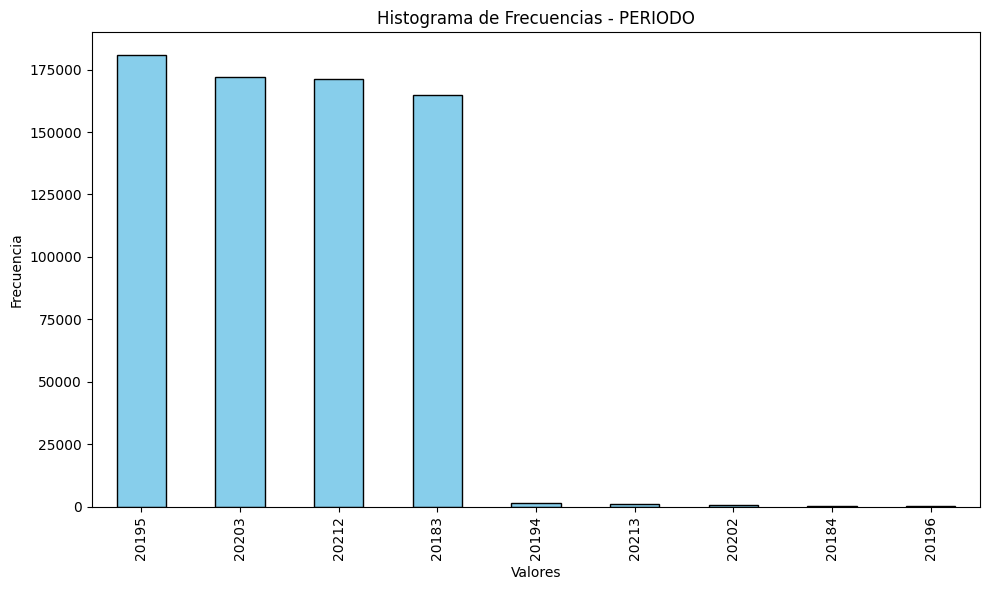


Columna: ESTU_PRGM_ACADEMICO

Tabla de frecuencias:
ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64


<ipython-input-12-8f5659ec8616>:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


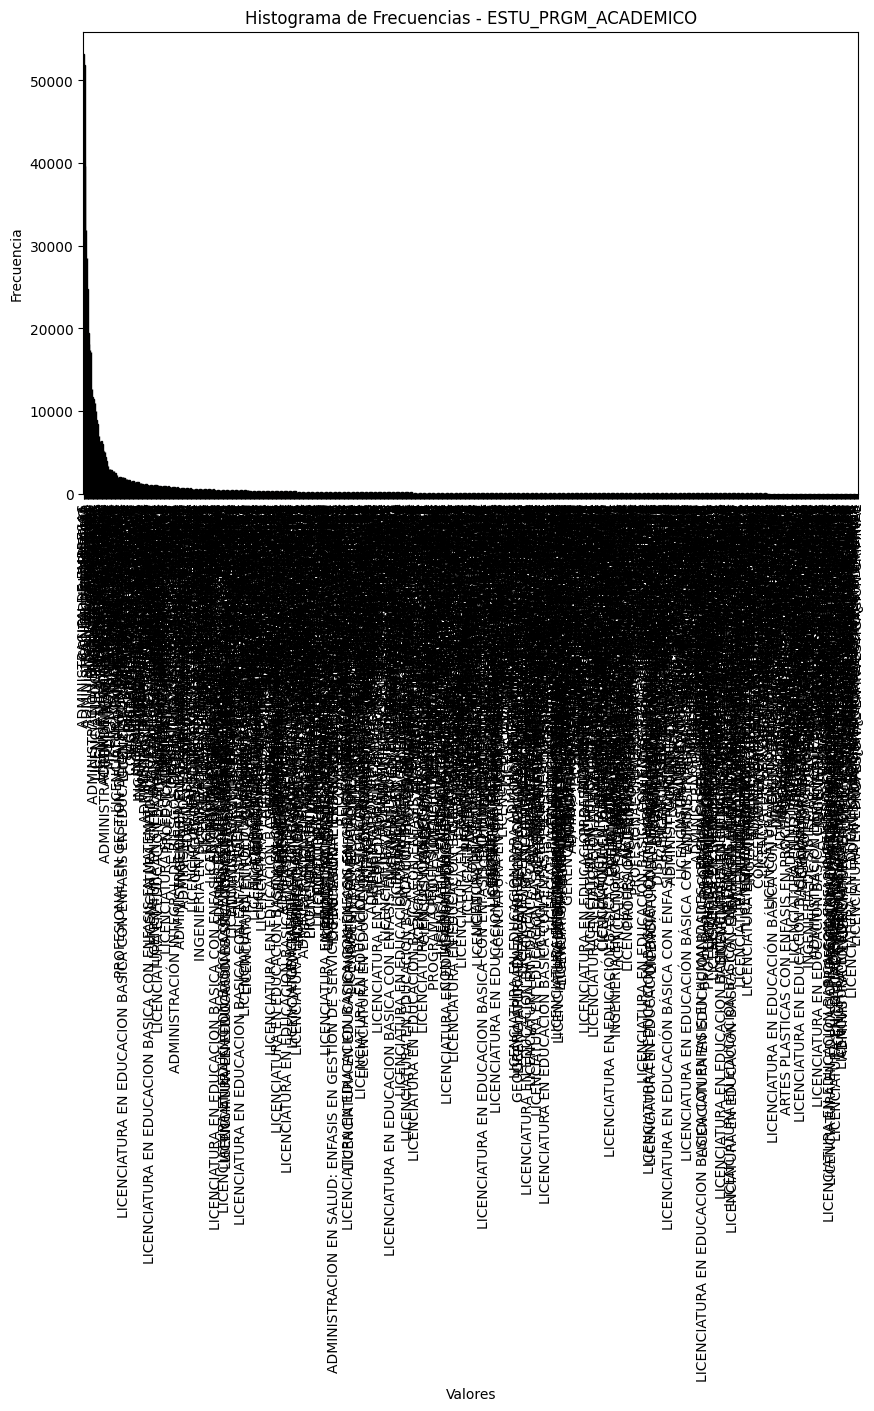


Columna: ESTU_PRGM_DEPARTAMENTO

Tabla de frecuencias:
ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64


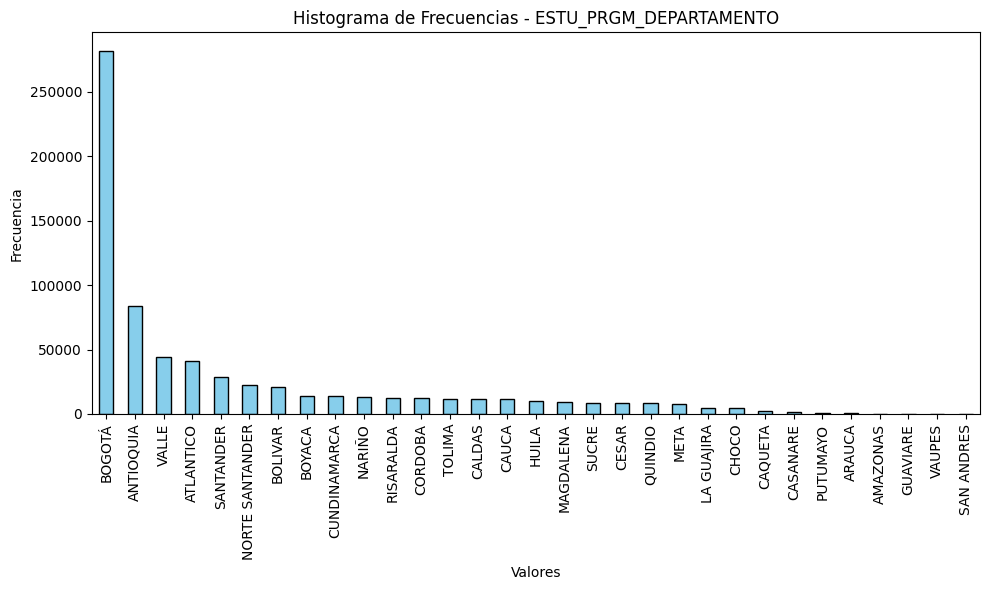


Columna: ESTU_VALORMATRICULAUNIVERSIDAD

Tabla de frecuencias:
ESTU_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68014
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            19528
NaN                                           6287
Name: count, dtype: int64


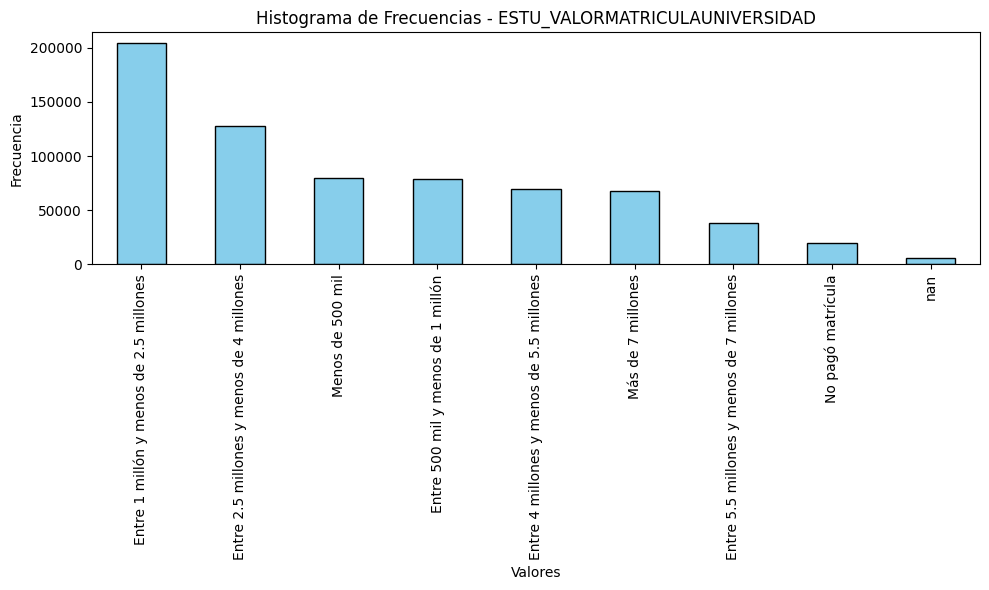


Columna: ESTU_HORASSEMANATRABAJA

Tabla de frecuencias:
ESTU_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
NaN                     30857
Name: count, dtype: int64


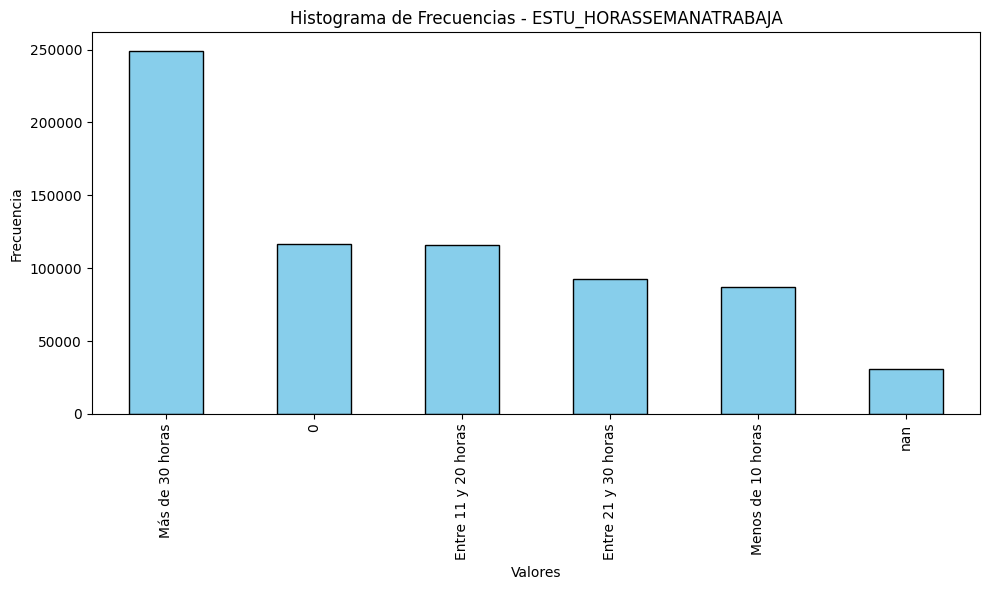


Columna: FAMI_ESTRATOVIVIENDA

Tabla de frecuencias:
FAMI_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
NaN             32137
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64


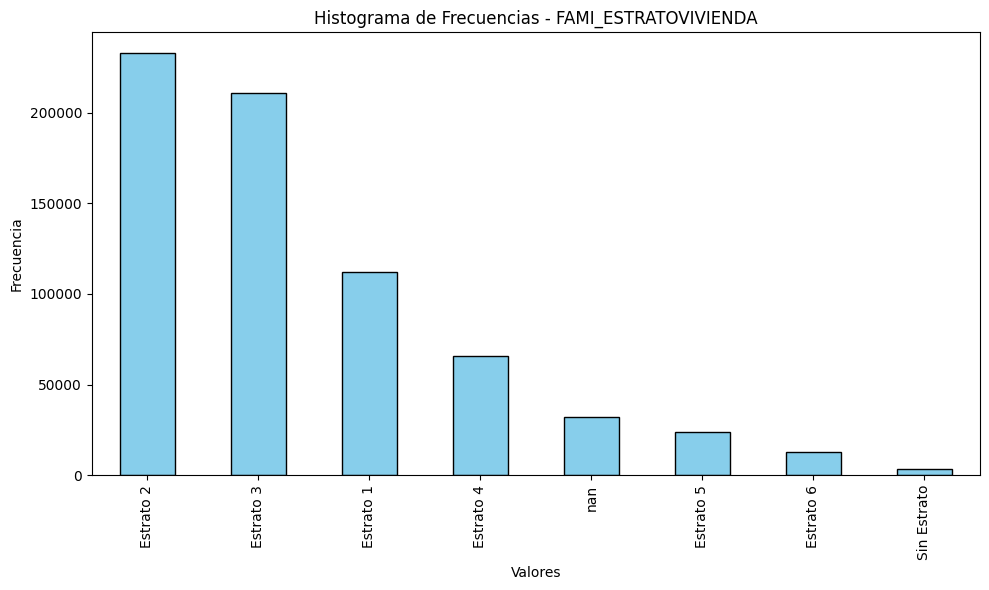


Columna: FAMI_TIENEINTERNET

Tabla de frecuencias:
FAMI_TIENEINTERNET
Si     592514
No      73357
NaN     26629
Name: count, dtype: int64


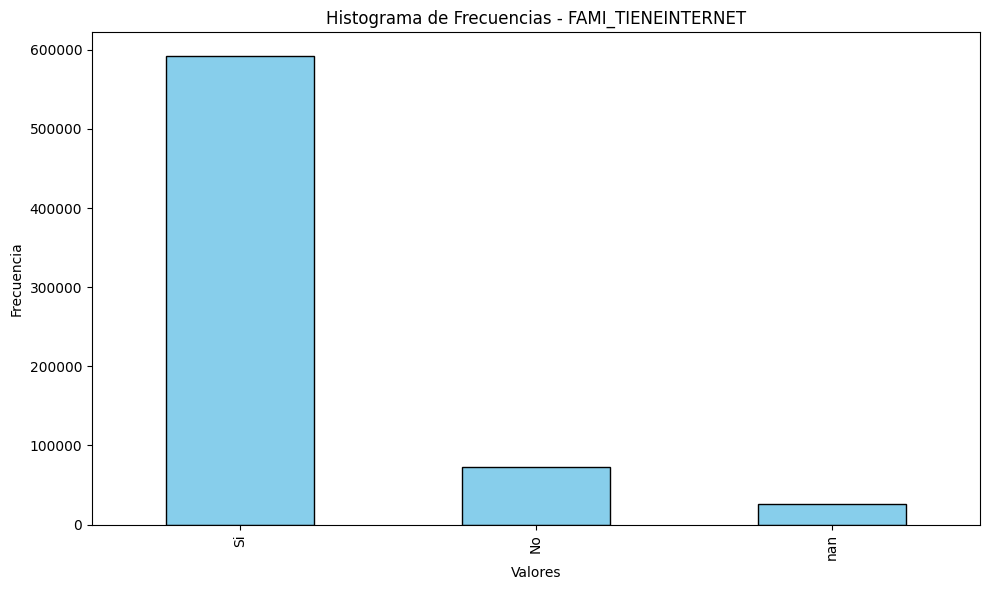


Columna: FAMI_EDUCACIONPADRE

Tabla de frecuencias:
FAMI_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
Postgrado                                44169
Educación profesional incompleta         27084
NaN                                      23178
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No sabe                                  16592
No Aplica                                 9229
Name: count, dtype: int64


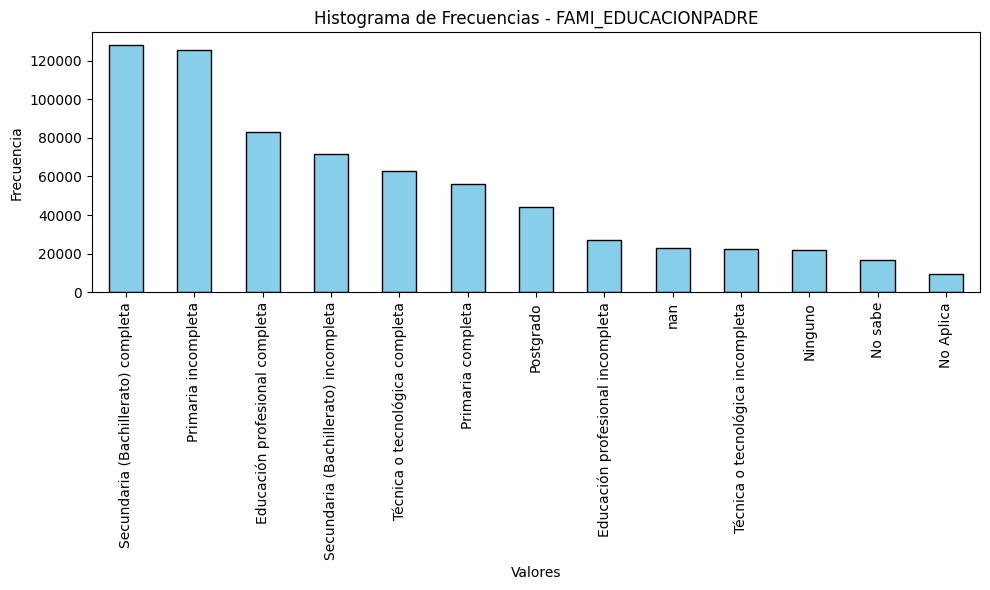


Columna: FAMI_EDUCACIONMADRE

Tabla de frecuencias:
FAMI_EDUCACIONMADRE
Secundaria (Bachillerato) completa      141744
Primaria incompleta                      99420
Técnica o tecnológica completa           89542
Educación profesional completa           85326
Secundaria (Bachillerato) incompleta     81012
Primaria completa                        56125
Postgrado                                46246
Técnica o tecnológica incompleta         27533
NaN                                      23664
Educación profesional incompleta         22470
Ninguno                                  14483
No sabe                                   3017
No Aplica                                 1918
Name: count, dtype: int64


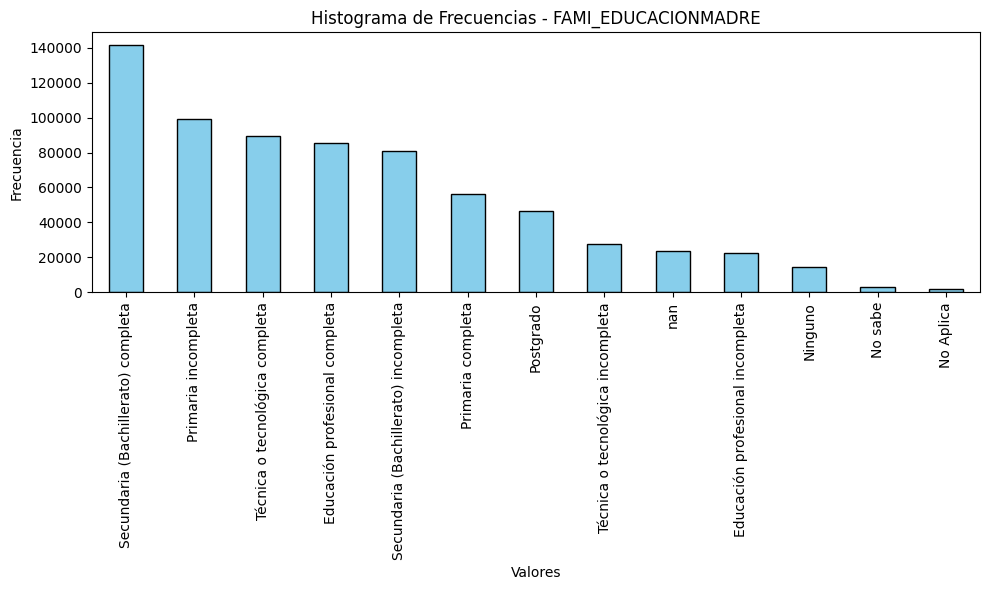


Columna: ESTU_PAGOMATRICULAPROPIO

Tabla de frecuencias:
ESTU_PAGOMATRICULAPROPIO
No     382201
Si     303801
NaN      6498
Name: count, dtype: int64


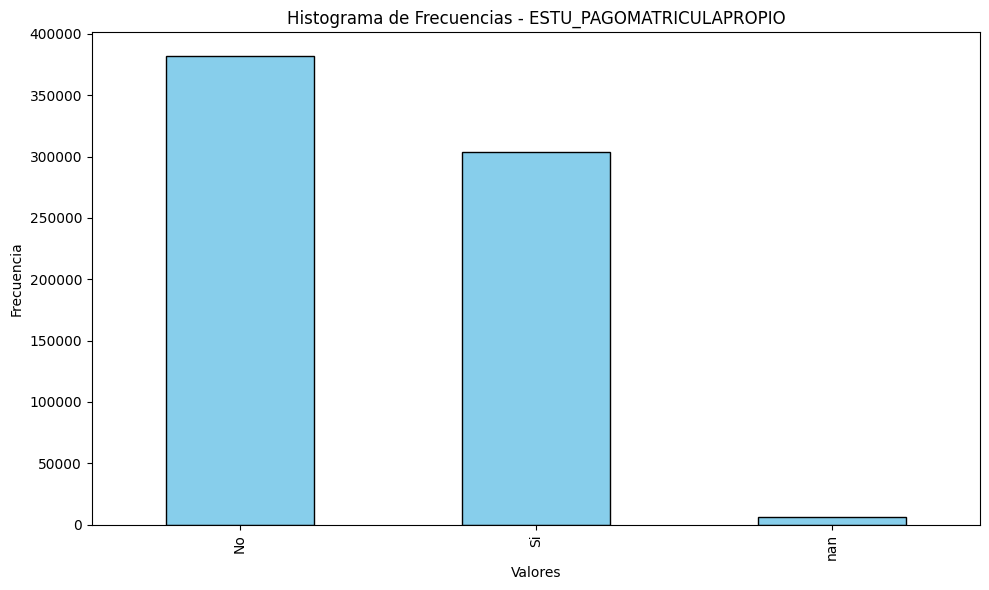


Columna: RENDIMIENTO_GLOBAL

Tabla de frecuencias:
RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


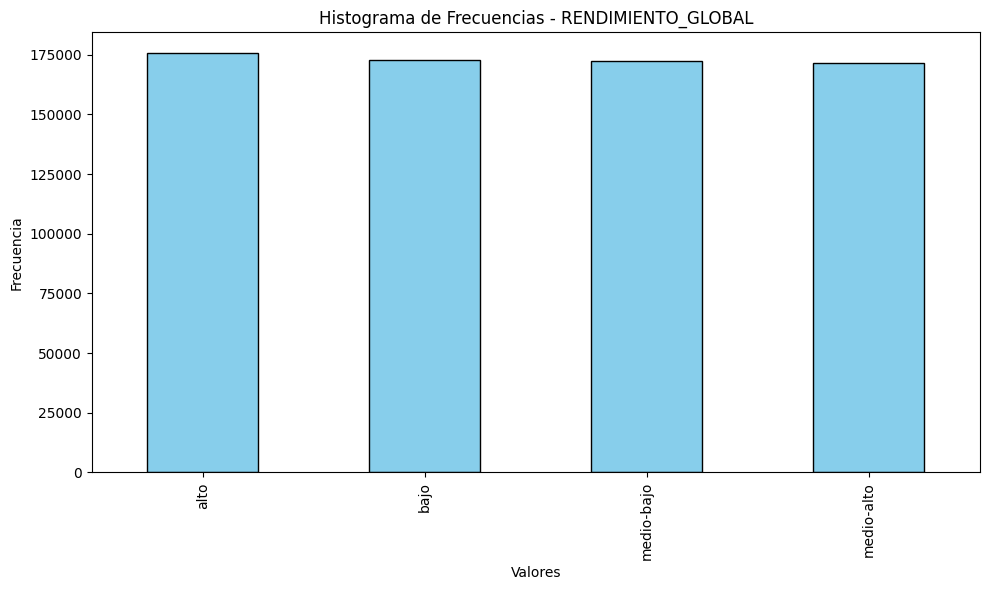

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo train.csv
df = pd.read_csv("train.csv")

# Iterar sobre cada columna del DataFrame
for col in df.columns:
    print(f"\n{'='*40}")
    print(f"Columna: {col}")

    # Calcular la frecuencia de cada valor único (incluyendo NaN)
    counts = df[col].value_counts(dropna=False)
    print("\nTabla de frecuencias:")
    print(counts)

    # Configurar la figura para el histograma
    plt.figure(figsize=(10, 6))

    # Para columnas numéricas con muchos valores únicos se utiliza plt.hist con bins,
    # de lo contrario se utiliza un gráfico de barras.
    if df[col].dtype in ['int64', 'float64'] and df[col].nunique() > 20:
        # Usar histograma para datos numéricos continuos o con muchos valores únicos
        plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.title(f"Histograma de {col}")
    else:
        # Usar gráfico de barras para datos categóricos o con pocos valores únicos
        counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.xlabel("Valores")
        plt.ylabel("Frecuencia")
        plt.title(f"Histograma de Frecuencias - {col}")

    plt.tight_layout()
    plt.show()


# PREPROCESADO DE DATOS

In [13]:
import pandas as pd

# Cargar el archivo train.csv
df = pd.read_csv("train.csv")

# Lista de columnas a procesar
cols = [
    "PERIODO",
    "ESTU_PRGM_ACADEMICO",
    "ESTU_PRGM_DEPARTAMENTO",
    "ESTU_VALORMATRICULAUNIVERSIDAD",
    "ESTU_HORASSEMANATRABAJA",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENEINTERNET",
    "FAMI_EDUCACIONPADRE",
    "FAMI_EDUCACIONMADRE",
    "ESTU_PAGOMATRICULAPROPIO"
]

# Crear una copia del DataFrame para el preprocesado
df_processed = df.copy()

# Procesar cada columna de la lista
for col in cols:
    # Si la columna es de tipo objeto (categórica)
    if df_processed[col].dtype == 'object':
        # Reemplazar espacios en blanco (cadenas vacías) por NaN y luego imputar con "Missing"
        df_processed[col] = df_processed[col].replace(r'^\s*$', pd.NA, regex=True)
        df_processed[col] = df_processed[col].fillna("Missing")
    else:
        # Si la columna es numérica, imputar valores faltantes con un valor especial (-1)
        df_processed[col] = df_processed[col].fillna(-1)

    # Obtener los valores únicos ordenados para generar un mapeo consistente
    unique_values = sorted(df_processed[col].unique())
    mapping = {val: idx for idx, val in enumerate(unique_values)}

    # Crear una nueva columna con los valores codificados
    new_col = col + "_encoded"
    df_processed[new_col] = df_processed[col].map(mapping)

    # Imprimir el mapeo para cada columna
    print(f"Mapping para la columna {col}:")
    print(mapping)
    print("-" * 50)

# Mostrar las primeras filas de las columnas codificadas
encoded_cols = [col for col in df_processed.columns if col.endswith("_encoded")]
print("\nPrimeras filas de las columnas codificadas:")
print(df_processed[encoded_cols].head())


Mapping para la columna PERIODO:
{20183: 0, 20184: 1, 20194: 2, 20195: 3, 20196: 4, 20202: 5, 20203: 6, 20212: 7, 20213: 8}
--------------------------------------------------
Mapping para la columna ESTU_PRGM_ACADEMICO:
{'3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES': 0, 'ACTIVIDAD FISICA Y DEPORTE': 1, 'ACUICULTURA': 2, 'ADMINISTRACION': 3, 'ADMINISTRACION  FINANCIERA': 4, 'ADMINISTRACION & SERVICIO': 5, 'ADMINISTRACION AERONAUTICA': 6, 'ADMINISTRACION AGROPECUARIA': 7, 'ADMINISTRACION AMBIENTAL': 8, 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES': 9, 'ADMINISTRACION BANCARIA Y FINANCIERA': 10, 'ADMINISTRACION COMERCIAL': 11, 'ADMINISTRACION COMERCIAL Y DE MERCADEO': 12, 'ADMINISTRACION DE COMERCIO EXTERIOR': 13, 'ADMINISTRACION DE EMPRESAS': 14, 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL': 15, 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES': 16, 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS': 17, 'ADMINISTRACION DE EMPRESAS COMERCIALES': 18, 'ADMINISTRACION DE EMPRESAS EN T

In [14]:
import pandas as pd
import numpy as np

# Lista de columnas a procesar (para TRAIN, incluye también la variable target)
cols_to_process = [
    "PERIODO",
    "ESTU_PRGM_ACADEMICO",
    "ESTU_PRGM_DEPARTAMENTO",
    "ESTU_VALORMATRICULAUNIVERSIDAD",
    "ESTU_HORASSEMANATRABAJA",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENEINTERNET",
    "FAMI_EDUCACIONPADRE",
    "FAMI_EDUCACIONMADRE",
    "ESTU_PAGOMATRICULAPROPIO",
    "RENDIMIENTO_GLOBAL"  # Solo en TRAIN
]

# ---------------------------
# Procesamiento del fichero TRAIN
# ---------------------------
df_train = pd.read_csv("train.csv")

# Diccionario para almacenar los mappings de cada columna
mappings = {}

# Procesar cada columna
for col in cols_to_process:
    # Para columnas de tipo objeto: reemplazar cadenas vacías o espacios por NaN y luego imputar "Missing"
    if df_train[col].dtype == object:
        df_train[col] = df_train[col].replace(r'^\s*$', np.nan, regex=True)
        df_train[col] = df_train[col].fillna("Missing")
    else:
        df_train[col] = df_train[col].fillna(-1)

    # Generar mapping: ordenar los valores únicos para tener un mapping consistente
    unique_vals = sorted(df_train[col].unique())
    mapping = {val: idx for idx, val in enumerate(unique_vals)}
    mappings[col] = mapping

    # Crear nueva columna codificada
    df_train[col + "_encoded"] = df_train[col].map(mapping)

    print(f"Mapping para la columna {col}:")
    print(mapping)
    print("-" * 40)

# Seleccionar la columna ID (sin cambios) y las columnas codificadas
encoded_cols = [col + "_encoded" for col in cols_to_process]
df_train_processed = df_train[["ID"] + encoded_cols]

# Guardar el fichero procesado de TRAIN
df_train_processed.to_csv("processed_train_model.csv", index=False)
print("\nArchivo 'processed_train_model.csv' generado.")

# ---------------------------
# Procesamiento del fichero TEST
# ---------------------------
# Las columnas a procesar en TEST (no se incluye el target)
cols_to_process_test = [
    "PERIODO",
    "ESTU_PRGM_ACADEMICO",
    "ESTU_PRGM_DEPARTAMENTO",
    "ESTU_VALORMATRICULAUNIVERSIDAD",
    "ESTU_HORASSEMANATRABAJA",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENEINTERNET",
    "FAMI_EDUCACIONPADRE",
    "FAMI_EDUCACIONMADRE",
    "ESTU_PAGOMATRICULAPROPIO"
]

df_test = pd.read_csv("test.csv")

for col in cols_to_process_test:
    if df_test[col].dtype == object:
        df_test[col] = df_test[col].replace(r'^\s*$', np.nan, regex=True)
        df_test[col] = df_test[col].fillna("Missing")
    else:
        df_test[col] = df_test[col].fillna(-1)

    # Aplicar el mapping obtenido de TRAIN
    mapping = mappings[col]
    new_col = col + "_encoded"
    df_test[new_col] = df_test[col].map(mapping)
    # Si se encuentran valores no vistos en TRAIN, se asigna el valor correspondiente a "Missing" o -1
    default_val = mapping.get("Missing", -1)
    df_test[new_col] = df_test[new_col].fillna(default_val)

# Seleccionar la columna ID y las columnas codificadas en TEST
encoded_cols_test = [col + "_encoded" for col in cols_to_process_test]
df_test_processed = df_test[["ID"] + encoded_cols_test]

# Guardar el fichero procesado de TEST
df_test_processed.to_csv("processed_test_model.csv", index=False)
print("\nArchivo 'processed_test_model.csv' generado.")


Mapping para la columna PERIODO:
{20183: 0, 20184: 1, 20194: 2, 20195: 3, 20196: 4, 20202: 5, 20203: 6, 20212: 7, 20213: 8}
----------------------------------------
Mapping para la columna ESTU_PRGM_ACADEMICO:
{'3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES': 0, 'ACTIVIDAD FISICA Y DEPORTE': 1, 'ACUICULTURA': 2, 'ADMINISTRACION': 3, 'ADMINISTRACION  FINANCIERA': 4, 'ADMINISTRACION & SERVICIO': 5, 'ADMINISTRACION AERONAUTICA': 6, 'ADMINISTRACION AGROPECUARIA': 7, 'ADMINISTRACION AMBIENTAL': 8, 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES': 9, 'ADMINISTRACION BANCARIA Y FINANCIERA': 10, 'ADMINISTRACION COMERCIAL': 11, 'ADMINISTRACION COMERCIAL Y DE MERCADEO': 12, 'ADMINISTRACION DE COMERCIO EXTERIOR': 13, 'ADMINISTRACION DE EMPRESAS': 14, 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL': 15, 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES': 16, 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS': 17, 'ADMINISTRACION DE EMPRESAS COMERCIALES': 18, 'ADMINISTRACION DE EMPRESAS EN TELECOMUNIC

# MODELO DE VALIDATION ACCURACY: 0.3645

**EXPLICACION DEL CODIGO:**

🎯 Simple Logistic Regression Classifier

📌 Modelo de Regresión Logística para predecir el rendimiento global de estudiantes a partir de datos preprocesados.

📌 Explicación del Código

🏗️ 1. Reconstrucción del Mapping del Target

✅ Se carga train.csv 📂 y se limpia la columna RENDIMIENTO_GLOBAL.
✅ Se reemplazan valores vacíos con "Missing".
✅ Se asigna un número único a cada categoría y se genera un diccionario inverso.

📊 2. Carga de Datos Preprocesados

📥 Se leen los archivos procesados:
🔹 processed_train_model.csv 📜 (datos de entrenamiento).
🔹 processed_test_model.csv 📜 (datos de prueba).

📌 Se definen:
✔️ X (características).
✔️ y (etiquetas codificadas numéricamente).

✂️ 3. División de Datos para Entrenamiento y Validación

📌 Se divide el conjunto de datos en:
✔️ 80% para entrenamiento.
✔️ 20% para validación.
📌 Se usa stratify=y para mantener la distribución de clases.

⚡ 4. Entrenamiento del Modelo (Regresión Logística)

📌 Se entrena un modelo simple de Regresión Logística:
🔥 LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42).

📊 Evaluación:
📌 Se calcula la precisión (accuracy_score) en el conjunto de validación.

📢 Resultado:
✅ Validation Accuracy: 🔢 XX.XX% (se muestra en la ejecución).

🎯 5. Predicción Final & Generación de Submission

📌 Se generan las predicciones finales en el conjunto de prueba.
📌 Se convierten los valores numéricos a etiquetas originales.
📌 Se crea el archivo submission_simple.csv 📁 con las predicciones finales.

📢 Resultado final:

🎉 "Submission file generated as 'submission_simple.csv'." 🎊







In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

###############################################
# Paso 1: Reconstruir el mapping del target
###############################################
# Cargar el fichero original de TRAIN para reconstruir el mapping de RENDIMIENTO_GLOBAL
train_original = pd.read_csv("train.csv")

# Reemplazar cadenas vacías o espacios por "Missing"
train_original["RENDIMIENTO_GLOBAL"] = (train_original["RENDIMIENTO_GLOBAL"]
                                         .replace(r'^\s*$', np.nan, regex=True)
                                         .fillna("Missing"))

# Obtener los valores únicos (ordenados) y crear el mapping
unique_target = sorted(train_original["RENDIMIENTO_GLOBAL"].unique())
mapping_target = {val: idx for idx, val in enumerate(unique_target)}
inv_mapping_target = {v: k for k, v in mapping_target.items()}

###############################################
# Paso 2: Cargar los datos procesados
###############################################
# Estos archivos fueron generados en el preprocesado:
# - processed_train_model.csv (contiene "ID" y las columnas codificadas, incluyendo RENDIMIENTO_GLOBAL_encoded)
# - processed_test_model.csv (contiene "ID" y las columnas codificadas)
df_train_proc = pd.read_csv("processed_train_model.csv")
df_test_proc = pd.read_csv("processed_test_model.csv")

# En TRAIN, la variable target es "RENDIMIENTO_GLOBAL_encoded"
target_col = "RENDIMIENTO_GLOBAL_encoded"

# Las features serán todas las columnas codificadas, excepto "ID" y el target
feature_cols = [col for col in df_train_proc.columns if col not in ["ID", target_col]]

###############################################
# Paso 3: Preparar los datos para el modelo
###############################################
X = df_train_proc[feature_cols]
y = df_train_proc[target_col].astype(int)

# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y)

###############################################
# Paso 4: Entrenar un modelo sencillo (Logistic Regression)
###############################################
# Se ha removido el parámetro 'multi_class'
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: {:.4f}".format(val_accuracy))

###############################################
# Paso 5: Predicción en TEST y generación del submission file
###############################################
# Usar todas las columnas codificadas en TEST (excluyendo "ID")
X_test = df_test_proc[[col for col in df_test_proc.columns if col != "ID"]]

# Realizar la predicción
y_test_pred = model.predict(X_test)

# Convertir las predicciones numéricas a las etiquetas originales usando el mapping inverso
y_test_labels = [inv_mapping_target[pred] for pred in y_test_pred]

# Crear el archivo de submission usando exactamente los mismos IDs que en test.csv
submission = pd.DataFrame({
    "ID": df_test_proc["ID"],
    "RENDIMIENTO_GLOBAL": y_test_labels
})
submission.to_csv("submission_simple.csv", index=False)
print("Submission file generated as 'submission_simple.csv'.")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.3654
Submission file generated as 'submission_simple.csv'.


In [18]:
SLCN = pd.read_csv('submission_simple.csv')

A CONTINUACION SE MUESTRA EL ARCHIVO SUBMISSION CSV GENERADO POR EL MODELO

In [19]:
SLCN.head()

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-alto
2,499179,bajo
3,782980,bajo
4,785185,medio-alto
